In [72]:
from trackml.dataset import load_event
from trackml.dataset import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [75]:
for event_id, hits, cells, particles, truth in load_dataset('data/train_5.zip'):
    truth_hits = pd.concat([hits, truth.drop(['hit_id'], axis=1)], axis=1)
    truth_hits['dist'] = truth_hits.apply(lambda x: x[1]**2 + x[2]**2 + x[3]**2, axis=1)
    truth_hits['rad_dist'] = truth_hits.apply(lambda x: x[1]**2 + x[2]**2, axis=1)
    break

In [76]:
truth_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,dist,rad_dist
0,1,-64.895897,-9.094710,-1502.5,7,2,1,896225190659227648,-64.886902,-9.105060,-1502.5,-0.171154,-0.045790,-4.101900,0.000005,2.261800e+06,4.294191e+03
1,2,-62.720901,-5.212090,-1502.5,7,2,1,734090793710518272,-62.741001,-5.213700,-1502.5,-0.541265,-0.020037,-12.917200,0.000007,2.261467e+06,3.961077e+03
2,3,-76.973999,-6.183370,-1502.5,7,2,1,747620559168208896,-76.980301,-6.172070,-1502.5,-0.360703,-0.127468,-6.141080,0.000011,2.263469e+06,5.963231e+03
3,4,-83.017097,-1.091810,-1502.5,7,2,1,76564973236518912,-83.001900,-1.080520,-1502.5,-0.235923,-0.027326,-4.354890,0.000005,2.264399e+06,6.893031e+03
4,5,-73.857498,-10.652600,-1502.5,7,2,1,117132554254942208,-73.842598,-10.649700,-1502.5,-0.565458,-0.074602,-10.740200,0.000006,2.263075e+06,5.568408e+03
5,6,-95.699898,-15.448400,-1502.5,7,2,1,684550235736768512,-95.688004,-15.454900,-1502.5,-0.568265,-0.120998,-9.005010,0.000006,2.266903e+06,9.397123e+03
6,7,-30.597300,3.184180,-1502.5,7,2,1,4523734434054144,-30.617701,3.182960,-1502.5,0.289495,0.007008,-6.748410,0.000005,2.258453e+06,9.463337e+02
7,8,-89.899902,-4.592620,-1502.5,7,2,1,423339808081838080,-89.885597,-4.595960,-1502.5,-1.090560,-0.031432,-18.301100,0.000012,2.265609e+06,8.103085e+03
8,9,-60.400700,-8.139080,-1502.5,7,2,1,553943784958722048,-60.411400,-8.122430,-1502.5,-0.205950,-0.005998,-4.972480,0.000008,2.261221e+06,3.714489e+03
9,10,-90.310997,-1.615700,-1502.5,7,2,1,941271151257059328,-90.314499,-1.601960,-1502.5,-0.638250,-0.034462,-10.681200,0.000008,2.265665e+06,8.158687e+03


In [61]:
tmp = truth_hits[truth_hits.particle_id!=0].groupby(['particle_id', 'volume_id', 'layer_id']).count()['hit_id'].reset_index()

In [81]:
truth_hits = truth_hits[truth_hits.particle_id != 0].sort_values(['particle_id', 'rad_dist'])

In [79]:
truth_hits['block'] = truth_hits['volume_id'].astype(str) + "_" + truth_hits['layer_id'].astype(str)

In [134]:
blocks = truth_hits.groupby('block')['particle_id'].count().reset_index()[['block']].values.reshape(48)
block_stat = pd.DataFrame(np.zeros((48, 48)))
block_stat.index = blocks
block_stat.columns = blocks

In [133]:
block_stat

,12_10,12_12,12_2,12_4,12_6,12_8,13_2,13_4,13_6,13_8,...,8_4,8_6,8_8,9_10,9_12,9_14,9_2,9_4,9_6,9_8
12_10,124.0,17.0,1.0,0.0,6.0,966.0,0.0,17.0,19.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12_12,968.0,150.0,0.0,0.0,1.0,9.0,3.0,10.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12_2,0.0,0.0,108.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12_4,0.0,0.0,867.0,132.0,2.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12_6,0.0,0.0,9.0,907.0,134.0,1.0,0.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12_8,4.0,0.0,1.0,5.0,933.0,133.0,1.0,3.0,12.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13_2,19.0,376.0,1.0,1.0,2.0,6.0,1308.0,5057.0,47.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13_4,22.0,380.0,0.0,1.0,2.0,12.0,0.0,1230.0,4259.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13_6,23.0,300.0,0.0,0.0,1.0,14.0,0.0,0.0,1066.0,3264.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13_8,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,871.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
def proc_arr(x):
    for i in range(len(x) - 1):
        block_stat.ix[x[i], x[i+1]] += 1

In [136]:
tmp = truth_hits.groupby('particle_id')['block'].apply(lambda x: x.tolist()).reset_index()
tmp['block'].apply(lambda x: proc_arr(x))
1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


1

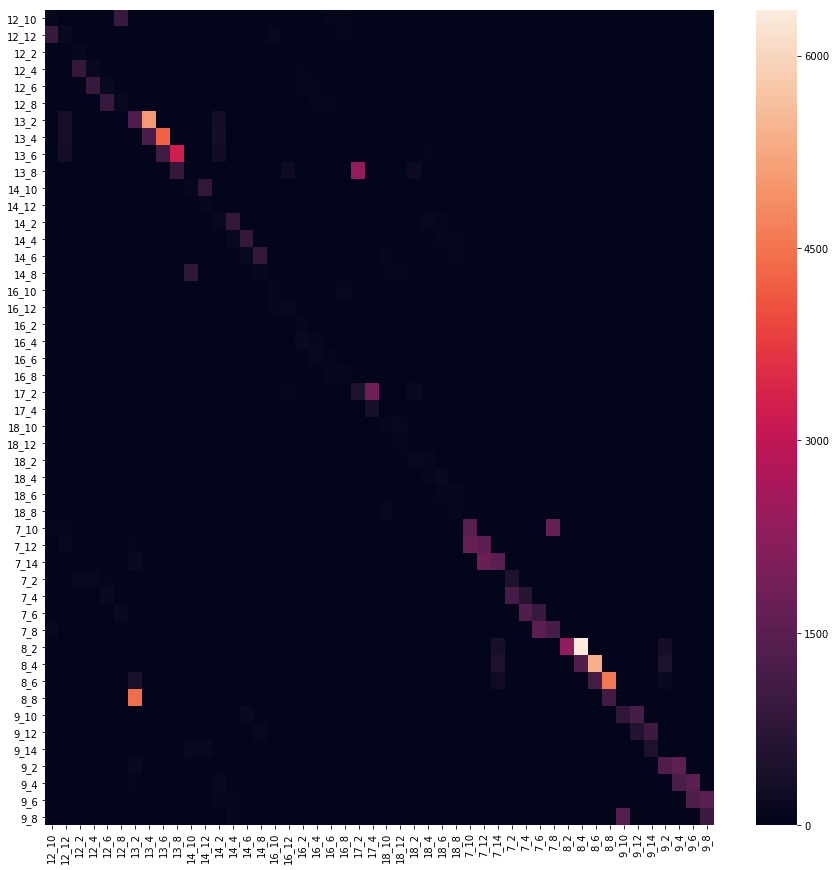

In [139]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(block_stat)

In [140]:
truth_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,dist,rad_dist,block
36651,36652,-38.421902,60.531502,100.994003,8,4,283,4503737066323968,-38.420101,60.532799,100.997002,-6.739070,10.656900,18.470600,0.000072,1.534009e+04,5.140305e+03,8_4
44634,44635,-61.762501,97.524200,165.076996,8,6,512,4503737066323968,-61.765202,97.522003,165.078003,-6.717910,10.668800,18.470800,0.000058,4.057599e+04,1.332558e+04,8_6
51788,51789,-91.977898,145.654999,248.330994,8,8,846,4503737066323968,-91.977600,145.654999,248.335999,-6.689160,10.686700,18.470301,0.000043,9.134359e+04,2.967531e+04,8_8
86491,86492,-139.442993,221.778000,379.600006,13,2,594,4503737066323968,-139.423996,221.785995,379.789001,-6.643440,10.709700,18.471300,0.000036,2.127260e+05,6.862983e+04,13_2
94317,94318,-188.819000,301.776001,517.400024,13,4,888,4503737066323968,-188.804993,301.783997,517.572998,-6.594780,10.739300,18.470699,0.000022,3.944242e+05,1.267214e+05,13_4
94311,94312,-191.951004,306.898010,526.400024,13,4,887,4503737066323968,-191.945007,306.899994,526.370972,-6.590950,10.741600,18.470699,0.000022,4.081286e+05,1.310316e+05,13_4
101825,101826,-262.704987,422.963989,725.799988,13,6,1392,4503737066323968,-262.671997,422.977997,725.585999,-6.524220,10.783100,18.468201,0.000022,7.746981e+05,2.479124e+05,13_6
108546,108547,-345.194000,560.494019,960.599976,13,8,2024,4503737066323968,-345.199005,560.491028,960.580017,-6.447720,10.829600,18.466700,0.000036,1.356065e+06,4.333124e+05,13_8
131631,131632,-431.626007,707.424011,1217.500000,18,2,83,4503737066323968,-434.338013,711.517029,1217.500000,-6.364140,10.881200,18.463699,0.000043,2.169056e+06,6.867497e+05,18_2
27467,27468,-23.600700,21.074499,28.903299,8,2,126,4503805785800704,-23.584499,21.089001,28.900999,-2.880440,2.561390,4.011740,0.000047,1.836528e+03,1.001128e+03,8_2


In [4]:
for event_id, hits, cells in load_dataset('data/test.zip', parts=['hits', 'cells']):
    break

In [3]:
particles.shape, cells.shape, hits.shape, truth.shape

((13855, 9), (734042, 4), (134245, 7), (134245, 9))

In [5]:
X = truth_hits[['hit_id', 'x', 'y', 'z', 'volume_id', 'layer_id', 'module_id', 'dist', 'particle_id']]

In [29]:
tmp = cells.groupby('hit_id')['value'].mean().reset_index().rename({'value':'value_mean'},axis=1)
X = pd.merge(X, tmp, on='hit_id', how='left')

tmp = cells.groupby('hit_id')['value'].min().reset_index().rename({'value':'value_min'},axis=1)
X = pd.merge(X, tmp, on='hit_id', how='left')

tmp = cells.groupby('hit_id')['value'].max().reset_index().rename({'value':'value_max'},axis=1)
X = pd.merge(X, tmp, on='hit_id', how='left')

tmp = cells.groupby('hit_id')['value'].std().reset_index().rename({'value':'value_std'},axis=1)
X = pd.merge(X, tmp, on='hit_id', how='left')

tmp = cells.groupby('hit_id')['value'].count().reset_index().rename({'value':'value_count'},axis=1)
X = pd.merge(X, tmp, on='hit_id', how='left')

In [52]:
tmp = X.groupby(['volume_id', 'layer_id', 'module_id'])['hit_id'].count().reset_index().rename({'hit_id':'cnt_in_module'},axis=1)
tmp1 = tmp.groupby(['volume_id', 'layer_id'])['cnt_in_module'].mean().reset_index().rename({'cnt_in_module':'cnt_layer_mean'}, axis=1)
tmp = pd.merge(tmp, tmp1, on=['volume_id', 'layer_id'], how='left')
tmp['cnt_in_layer_diff'] = tmp['cnt_in_module'] - tmp['cnt_layer_mean']

X = pd.merge(X, tmp, on=['volume_id', 'layer_id', 'module_id'], how='left')

In [53]:
X

,hit_id,x,y,z,volume_id,layer_id,module_id,dist,particle_id,fold,value_mean,value_min,value_max,value_std,value_count,cnt_in_module,cnt_layer_mean,cnt_in_layer_diff
0,1,-64.895897,-9.094710,-1502.5,7,2,1,2.261800e+06,896225190659227648,0.0,0.292802,0.292802,0.292802,NaN,1,20,16.574074,3.425926
1,2,-62.720901,-5.212090,-1502.5,7,2,1,2.261467e+06,734090793710518272,2.0,0.150701,0.011325,0.290077,0.197108,2,20,16.574074,3.425926
2,3,-76.973999,-6.183370,-1502.5,7,2,1,2.263469e+06,747620559168208896,4.0,0.283195,0.283195,0.283195,NaN,1,20,16.574074,3.425926
3,4,-83.017097,-1.091810,-1502.5,7,2,1,2.264399e+06,76564973236518912,0.0,0.337959,0.337959,0.337959,NaN,1,20,16.574074,3.425926
4,5,-73.857498,-10.652600,-1502.5,7,2,1,2.263075e+06,117132554254942208,2.0,0.255510,0.255510,0.255510,NaN,1,20,16.574074,3.425926
5,6,-95.699898,-15.448400,-1502.5,7,2,1,2.266903e+06,684550235736768512,2.0,0.091942,0.054556,0.126038,0.035855,3,20,16.574074,3.425926
6,7,-30.597300,3.184180,-1502.5,7,2,1,2.258453e+06,4523734434054144,0.0,0.272730,0.272730,0.272730,NaN,1,20,16.574074,3.425926
7,8,-89.899902,-4.592620,-1502.5,7,2,1,2.265609e+06,423339808081838080,3.0,0.156256,0.041993,0.270520,0.161593,2,20,16.574074,3.425926
8,9,-60.400700,-8.139080,-1502.5,7,2,1,2.261221e+06,553943784958722048,2.0,0.330355,0.330355,0.330355,NaN,1,20,16.574074,3.425926
9,10,-90.310997,-1.615700,-1502.5,7,2,1,2.265665e+06,941271151257059328,1.0,0.272399,0.272399,0.272399,NaN,1,20,16.574074,3.425926


In [54]:
X.shape

(134245, 18)

In [31]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)
folds = []
fold_id = 0
X['fold'] = np.nan
for itr, ite in kf.split(X, X):
    X.ix[ite, 'fold'] = fold_id
    folds += [[itr, ite]]
    fold_id += 1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [55]:
#%%time
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

scores = []
for fold_id in range(5):
    lgb = lgbm.sklearn.LGBMClassifier()
    lgb.fit(X[X.fold != fold_id].drop(['hit_id','particle_id', 'fold'],axis=1), X[X.fold != fold_id]['particle_id'] != 0)

    pred = lgb.predict(X[X.fold == fold_id].drop(['hit_id','particle_id', 'fold'],axis=1))#[:,1]
    scores += [accuracy_score( X[X.fold == fold_id]['particle_id'] != 0, pred)]
scores = np.array(scores)
print(scores.mean(), scores.std())

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

0.884986405452717 0.0005991754643283667


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [57]:
125*10/60

20.833333333333332

In [ ]:
0.8857387612201573 0.0007828257085430244

In [37]:
lgb.feature_importances_

array([293, 291, 278,  94, 181, 233, 520, 200,  69, 137, 179, 525])

In [17]:
X[X.particle_id!=0].shape[0] / X.shape[0]

0.8680099817497858

In [38]:
pred.mean()

0.9434243361019032

In [50]:
tmp

,volume_id,layer_id,module_id,cnt_in_module,cnt_layer_mean,cnt_in_layer_diff
0,7,2,1,20,16.574074,3.425926
1,7,2,2,14,16.574074,-2.574074
2,7,2,3,15,16.574074,-1.574074
3,7,2,4,26,16.574074,9.425926
4,7,2,5,13,16.574074,-3.574074
5,7,2,6,25,16.574074,8.425926
6,7,2,7,13,16.574074,-3.574074
7,7,2,8,7,16.574074,-9.574074
8,7,2,9,29,16.574074,12.425926
9,7,2,10,14,16.574074,-2.574074


In [117]:
truth_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,dist
0,1,-64.895897,-9.094710,-1502.5,7,2,1,896225190659227648,-64.886902,-9.105060,-1502.5,-0.171154,-0.045790,-4.101900,0.000005,2.261800e+06
1,2,-62.720901,-5.212090,-1502.5,7,2,1,734090793710518272,-62.741001,-5.213700,-1502.5,-0.541265,-0.020037,-12.917200,0.000007,2.261467e+06
2,3,-76.973999,-6.183370,-1502.5,7,2,1,747620559168208896,-76.980301,-6.172070,-1502.5,-0.360703,-0.127468,-6.141080,0.000011,2.263469e+06
3,4,-83.017097,-1.091810,-1502.5,7,2,1,76564973236518912,-83.001900,-1.080520,-1502.5,-0.235923,-0.027326,-4.354890,0.000005,2.264399e+06
4,5,-73.857498,-10.652600,-1502.5,7,2,1,117132554254942208,-73.842598,-10.649700,-1502.5,-0.565458,-0.074602,-10.740200,0.000006,2.263075e+06
5,6,-95.699898,-15.448400,-1502.5,7,2,1,684550235736768512,-95.688004,-15.454900,-1502.5,-0.568265,-0.120998,-9.005010,0.000006,2.266903e+06
6,7,-30.597300,3.184180,-1502.5,7,2,1,4523734434054144,-30.617701,3.182960,-1502.5,0.289495,0.007008,-6.748410,0.000005,2.258453e+06
7,8,-89.899902,-4.592620,-1502.5,7,2,1,423339808081838080,-89.885597,-4.595960,-1502.5,-1.090560,-0.031432,-18.301100,0.000012,2.265609e+06
8,9,-60.400700,-8.139080,-1502.5,7,2,1,553943784958722048,-60.411400,-8.122430,-1502.5,-0.205950,-0.005998,-4.972480,0.000008,2.261221e+06
9,10,-90.310997,-1.615700,-1502.5,7,2,1,941271151257059328,-90.314499,-1.601960,-1502.5,-0.638250,-0.034462,-10.681200,0.000008,2.265665e+06


In [ ]:
tmp = truth_hits[truth_hits.particle_id != 0].groupby('particle_id')['volume_id'].unique().astype('str').unique()

In [85]:
volume_ways = []
for i in tmp:
    #print(i)
    #print(i.replace('[', '').replace(']', '').replace('  ', ' ').strip().split(' '))
    volume_ways += [np.array(i.replace('[', '').replace(']', '').replace('  ', ' ').strip().split(' ')).astype('int')]

In [86]:
volume_ways

[array([ 8, 13, 18]),
 array([ 8, 13, 17]),
 array([ 8, 13, 14, 18]),
 array([7]),
 array([9]),
 array([ 8, 13, 16]),
 array([ 8, 12, 13, 16]),
 array([ 8, 13]),
 array([ 8, 13, 16, 17]),
 array([8, 9]),
 array([12, 13]),
 array([ 7, 12]),
 array([ 7,  8, 12]),
 array([14]),
 array([ 8,  9, 14]),
 array([ 7, 12, 13, 16]),
 array([ 8, 13, 17, 18]),
 array([8]),
 array([ 8, 12, 13]),
 array([7, 8]),
 array([17]),
 array([12]),
 array([14, 18]),
 array([13, 17]),
 array([ 9, 14]),
 array([18]),
 array([ 8,  9, 13, 14, 18]),
 array([13, 16]),
 array([13, 18]),
 array([13]),
 array([ 7, 12, 13]),
 array([13, 14, 18]),
 array([12, 16]),
 array([ 9, 13]),
 array([ 9, 13, 14]),
 array([ 7,  8, 12, 13, 16]),
 array([13, 14]),
 array([ 8,  9, 13, 14]),
 array([ 8, 13, 14]),
 array([ 9, 13, 14, 18]),
 array([ 7, 13]),
 array([13, 17, 18]),
 array([ 7,  8, 12, 13]),
 array([ 8, 12, 16]),
 array([16]),
 array([ 8, 12, 13, 16, 17]),
 array([13, 16, 17]),
 array([ 7,  8, 13]),
 array([17, 18]),
 arra

In [79]:
i

'[ 7  8 12]'

In [ ]:
[[8],
[8, 7],
[8, 9],
[]

In [110]:
truth_hits.groupby('particle_id')['dist'].unique()

particle_id
0                      [2275009.1639188463, 2255175.3752792994, 22513...
4503737066323968       [15340.093938731661, 40575.99073057868, 91343....
4503805785800704       [1836.5282841985536, 1972.17362259543, 10418.6...
4503874505277440       [2722.59358986974, 3114.6875806139005, 15135.6...
4503943224754176       [2270.530766536791, 12837.434213006407, 33975....
4504011944230912       [11669.402779109721, 59314.50239775228, 156646...
4504218102661120       [2262439.187492596, 1700053.2259493864, 121788...
4504286822137856       [670166.3284220578, 676738.5587873871, 669348....
4504424261091328       [3394.672846417985, 3648.1883807945023, 19124....
4504492980568064       [4176.683817010472, 4473.835092382, 20013.3233...
4504561700044800       [4048.6254641446903, 18304.357641122726, 47244...
4504630419521536       [7978.033331036193, 40567.828604565584, 102832...
4504836577951744       [1093.6784756163515, 5448.902087560237, 13676....
4504905297428480       [1455.7000576007

In [107]:
truth_hits[truth_hits.particle_id != 0].sort_values(['particle_id', 'volume_id', 'layer_id', 'module_id'])

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,dist
36651,36652,-38.421902,60.531502,100.994003,8,4,283,4503737066323968,-38.420101,60.532799,100.997002,-6.739070,10.656900,18.470600,0.000072,1.534009e+04
44634,44635,-61.762501,97.524200,165.076996,8,6,512,4503737066323968,-61.765202,97.522003,165.078003,-6.717910,10.668800,18.470800,0.000058,4.057599e+04
51788,51789,-91.977898,145.654999,248.330994,8,8,846,4503737066323968,-91.977600,145.654999,248.335999,-6.689160,10.686700,18.470301,0.000043,9.134359e+04
86491,86492,-139.442993,221.778000,379.600006,13,2,594,4503737066323968,-139.423996,221.785995,379.789001,-6.643440,10.709700,18.471300,0.000036,2.127260e+05
94311,94312,-191.951004,306.898010,526.400024,13,4,887,4503737066323968,-191.945007,306.899994,526.370972,-6.590950,10.741600,18.470699,0.000022,4.081286e+05
94317,94318,-188.819000,301.776001,517.400024,13,4,888,4503737066323968,-188.804993,301.783997,517.572998,-6.594780,10.739300,18.470699,0.000022,3.944242e+05
101825,101826,-262.704987,422.963989,725.799988,13,6,1392,4503737066323968,-262.671997,422.977997,725.585999,-6.524220,10.783100,18.468201,0.000022,7.746981e+05
108546,108547,-345.194000,560.494019,960.599976,13,8,2024,4503737066323968,-345.199005,560.491028,960.580017,-6.447720,10.829600,18.466700,0.000036,1.356065e+06
131631,131632,-431.626007,707.424011,1217.500000,18,2,83,4503737066323968,-434.338013,711.517029,1217.500000,-6.364140,10.881200,18.463699,0.000043,2.169056e+06
27467,27468,-23.600700,21.074499,28.903299,8,2,126,4503805785800704,-23.584499,21.089001,28.900999,-2.880440,2.561390,4.011740,0.000047,1.836528e+03


In [106]:
truth_hits[truth_hits.particle_id != 0].sort_values(['particle_id', 'volume_id'])

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,dist
36651,36652,-38.421902,60.531502,100.994003,8,4,283,4503737066323968,-38.420101,60.532799,100.997002,-6.739070,10.656900,18.470600,0.000072,1.534009e+04
44634,44635,-61.762501,97.524200,165.076996,8,6,512,4503737066323968,-61.765202,97.522003,165.078003,-6.717910,10.668800,18.470800,0.000058,4.057599e+04
51788,51789,-91.977898,145.654999,248.330994,8,8,846,4503737066323968,-91.977600,145.654999,248.335999,-6.689160,10.686700,18.470301,0.000043,9.134359e+04
86491,86492,-139.442993,221.778000,379.600006,13,2,594,4503737066323968,-139.423996,221.785995,379.789001,-6.643440,10.709700,18.471300,0.000036,2.127260e+05
94311,94312,-191.951004,306.898010,526.400024,13,4,887,4503737066323968,-191.945007,306.899994,526.370972,-6.590950,10.741600,18.470699,0.000022,4.081286e+05
94317,94318,-188.819000,301.776001,517.400024,13,4,888,4503737066323968,-188.804993,301.783997,517.572998,-6.594780,10.739300,18.470699,0.000022,3.944242e+05
101825,101826,-262.704987,422.963989,725.799988,13,6,1392,4503737066323968,-262.671997,422.977997,725.585999,-6.524220,10.783100,18.468201,0.000022,7.746981e+05
108546,108547,-345.194000,560.494019,960.599976,13,8,2024,4503737066323968,-345.199005,560.491028,960.580017,-6.447720,10.829600,18.466700,0.000036,1.356065e+06
131631,131632,-431.626007,707.424011,1217.500000,18,2,83,4503737066323968,-434.338013,711.517029,1217.500000,-6.364140,10.881200,18.463699,0.000043,2.169056e+06
27467,27468,-23.600700,21.074499,28.903299,8,2,126,4503805785800704,-23.584499,21.089001,28.900999,-2.880440,2.561390,4.011740,0.000047,1.836528e+03


In [36]:
particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503737066323968,-0.013683,0.021309,-3.997500,-6.774670,10.634500,18.471399,1,9
1,4503805785800704,-0.013683,0.021309,-3.997500,-2.867750,2.576280,4.011590,-1,14
2,4503874505277440,-0.013683,0.021309,-3.997500,-24.148399,61.841000,96.351799,1,11
3,4503943224754176,-0.013683,0.021309,-3.997500,-0.370760,-0.137155,0.500570,1,11
4,4504011944230912,-0.013683,0.021309,-3.997500,-0.963170,-0.581280,3.710650,-1,12
5,4504218102661120,-0.013683,0.021309,-3.997500,-0.617289,0.160341,-11.827000,-1,15
6,4504286822137856,-0.013683,0.021309,-3.997500,-0.019595,1.553350,39.582100,1,11
7,4504424261091328,-0.013683,0.021309,-3.997500,0.207768,-3.948060,6.609950,-1,10
8,4504492980568064,-0.013683,0.021309,-3.997500,-0.622706,-1.773990,-3.048020,1,12
9,4504561700044800,-0.013683,0.021309,-3.997500,-0.960269,-1.253440,-2.455020,-1,11


In [29]:
cells[cells.hit_id == 1500]

,hit_id,ch0,ch1,value
2329,1500,236,437,0.058964
2330,1500,236,438,0.126918
2331,1500,235,438,0.114683
2332,1500,235,439,0.029769


In [23]:
cells

,hit_id,ch0,ch1,value
0,1,247,629,0.292802
1,2,173,586,0.011325
2,2,173,585,0.290077
3,3,170,839,0.283195
4,4,59,939,0.337959
5,5,264,790,0.255510
6,6,325,1183,0.054556
7,6,325,1184,0.126038
8,6,326,1184,0.095233
9,7,56,4,0.272730


In [20]:
hits['hit_id'].unique().shape

(134245,)

In [21]:
cells['hit_id'].unique().shape

(134245,)

In [31]:
truth['particle_id'].unique().shape

(11928,)